# 6. The Central Dogma of Molecular Biology


The __Central Dogma of Molecular Biology__  is the process by which the instructions in DNA are converted into a functional product. Althoug is a cornerstone in modern biology, It was introduces by the physicist Francis Crick (the same Crick that was received the Nobel prize for the structure of DNA). It its most simplest definition, it involves the following processes:

- _Replication_: DNA is copied during cell division so the two daughter cells inherit the same genetic information. 

- _Transcription_: the information in the DNA of every cell is converted into small, portable RNA messages.

- _Translation_: During translation, these messages travel from where the DNA is in the cell nucleus to the ribosomes where they are ‘read’ to make specific proteins.

This transcription-Translation tandem is the main tool by which cells perform tasks and respond to external cues, so it is at the core of any cellular process. 

We will write a mathematical simplified version of the Central Dogma using the differential form of the Mass action Law. To do that, we will consider a gene that is regulated by a transcription factor $T$, and let $M$ denote the RNA molecular species resulting from this gene transcription. Under the assumption that chemical kinetics and the Mass action can be used to model gene expression and gene regulation, we can write the following reaction:

\begin{align}
T+D &\overset{k_M}{\longrightarrow} M + T + D \tag{1}
\end{align}

where 
- $[M]$ is the concentration of mRNA 
- $[D]$ is the concentration of gene copies
- $[T]$ is the transcription factor
- $k_M$ is the maximum transcription rate of a gene copy 

to rename variables, we define the state vector as:
$$
\begin{align}
X= \begin{bmatrix}
X_1 \\ X_2 \\ X_3 \end{bmatrix}=\begin{bmatrix}T \\ D \\ M\end{bmatrix} \tag{2}
\end{align}
$$

and the stoichiometric matrices are
$$
A=\begin{bmatrix}
  1   &  1    &  0       \end{bmatrix} ; 
B=\begin{bmatrix}
  1   &  1  &  1       \end{bmatrix}; \tag{3}
$$

In [13]:
A = [1 1 0]
B = [1 1 1]
stoichiometric_matrix= (B-A)'
println("The stoichiometric matrix is $stoichiometric_matrix ")

The stoichiometric matrix is [0; 0; 1] 


$$
K=\begin{pmatrix}
 k_M\\ 
\end{pmatrix} \tag{4}
$$

and 

$$X^A=\begin{pmatrix}
X_1^1 \cdot X_2^1 \cdot X_3^0
\end{pmatrix}=\begin{pmatrix}
X_1\cdot X_2
\end{pmatrix} \tag{5}
$$



So, we put all ingredients together

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t}\\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \end{bmatrix}& 
=  \begin{bmatrix} 0  \\ 0 \\ 1  \end{bmatrix}
\begin{pmatrix}
 k_M  
\end{pmatrix}
\begin{pmatrix}
 X_1 \cdot X_2
\end{pmatrix} 
\end{align} \tag{6}
$$

which, after multiplying the matrices and returning the original name of the variables, we obtain:

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}=  k_M [D]  [T]\tag{7}
$$


We see that  `D` and `T` are not consumed during the process, and the process is governed by a single equation. 
To solve this equation, we integrate and obtain:
 
 $$\begin{align*}
  \int \mathrm{d} [M] &= \int k_M [D] [T]  \mathrm{d} t\tag{8}\\
      M(t)&= k_M \cdot [D]\cdot  [T] \cdot t + C \tag{9}\\
 \end{align*}$$ 

where $C$ is the integration constant. To calculate it we use the boundaty condition of teh initial concetration of $M(0)$
 $$\begin{align*}
      M(0)&= k_M \cdot [D]\cdot  [T] \cdot 0 + C \tag{10}\\
      C&=M(0)
 \end{align*}$$ 

so

$$\begin{align*}
      M(t)&= M(0) + k_M \cdot [D]\cdot  [T] \cdot t  \tag{11}
 \end{align*}$$ 

which is basically a constant increase in the amount of mRNA over time. 



In [1]:
using Plots
gr()

Plots.GRBackend()

In [4]:
k_M=0.1
T=1
D=1
M₀=0.2
t=collect(0:0.1:10);

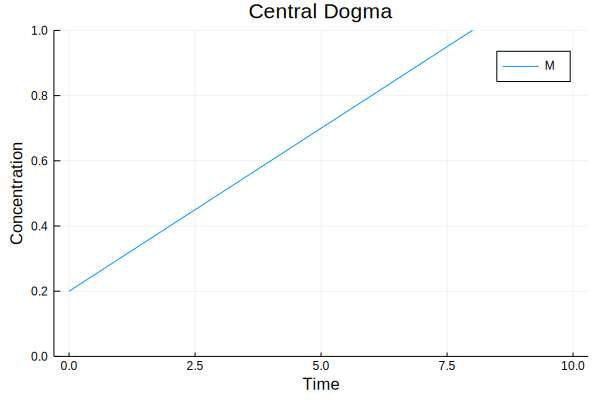

In [5]:
plot(t,t-> M₀+k_M*D*T*t,label="\\ M",seriestype=:line,ylims = (0,1))
title!("Central Dogma")
xaxis!("Time")
yaxis!("Concentration")

### Constant degradation of mRNA

We now that mRNA is a highly unstable molecule, so a more realistic picture should include a degradation term of the mRNA. We  will assume that this degradation rate is constant and equal to $\gamma_M$.
$$
\begin{align}
T+D &\overset{k_M}{\longrightarrow} M + T + D \tag{12} \\ 
M &\overset{\gamma_M}{\longrightarrow} \emptyset \tag{13}
\end{align}$$

Now, following the same notation the stoichiometric matrices are
$$
A=\begin{bmatrix}
  1   &  1    &  0   \\ 
   0  &  0    &  1   \end{bmatrix} ;
B=\begin{bmatrix}
  1   &  1  &  1  \\
   0   &  0  &  0 \end{bmatrix}; \tag{14}
$$

In [11]:
A = [1 1 0; 0 0 1]
B = [1 1 1;0 0 0 ]
stoichiometric_matrix= (B-A)'
println("The stoichiometric matrix is $stoichiometric_matrix ")

The stoichiometric matrix is [0 0; 0 0; 1 -1] 


Now the diagonal matrix of rate constants is;
$$
K=\begin{pmatrix}
 k_M & 0 \\
 0 & \gamma_M
\end{pmatrix} \tag{15}
$$

and 

$$X^A=\begin{pmatrix}
X_1^1 \cdot X_2^1 \cdot X_3^0\\
X_1^0 \cdot X_2^0 \cdot X_3^1
\end{pmatrix}=\begin{pmatrix}
X_1\cdot X_2\\
X_3
\end{pmatrix} \tag{16}
$$


So, we put all ingredients together

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t}\\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \end{bmatrix}& 
=  \begin{bmatrix} 0  & 0 \\ 0  & 0 \\ 1 & -1  \end{bmatrix}
\begin{pmatrix}
 k_M & 0 \\
 0 & \gamma_M
\end{pmatrix}
\begin{pmatrix}
X_1\cdot X_2\\
X_3
\end{pmatrix}  = \begin{bmatrix} 0  & 0 \\ 0  & 0 \\ 1 & -1  \end{bmatrix}
\begin{pmatrix}
k_M \cdot X_1\cdot X_2\\
\gamma_M \cdot X_3
\end{pmatrix} \tag{17}
\end{align} 
$$

which, after multiplying the matrices and returning the original name of the variables, we obtain the ODE governing the dynamics of the RNA concentration [M]:

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}=  k_M [D]  [T]- \gamma_M [M] \tag{18}
$$

To solve this equation, we first separate the variables in both sides of the equation as: 

$$\begin{align*}
   \frac{\mathrm{d} [M]}{\mathrm{d} t} + \gamma_M [M] &=  k_M [D] [T] \tag{19}\\
 \end{align*}$$  
   
   We need to calculate the integrating factor, $e^{ \int p(x)dx }$, which in this case is $e^{\gamma_M \cdot t}$. We then multiply both terms in the previous equation by the integrating factor. In this case is simply 
  $$\begin{align*}
   e^{\gamma_M \cdot t} \frac{\mathrm{d} [M]}{\mathrm{d} t} + \gamma_M [M] e^{\gamma_M \cdot t} &=  k_M [D] [T] e^{\gamma_M \cdot t}\tag{20}
 \end{align*}$$  
 the first term of the equation is simply
  
  $$\begin{align*}
   \frac{\mathrm{d} ([M] e^{\gamma_M \cdot t})}{\mathrm{d} t} &=  k_M [D] [T] e^{\gamma_M \cdot t} \tag{20}
 \end{align*}$$ 
 
 we change the `dt` to the left side and then integrate both sides of the equation:
 $$\begin{align*}
  \int \mathrm{d} ([M] e^{\gamma_M \cdot t}) &= \int k_M [D] [T] e^{\gamma_M \cdot t} \mathrm{d} t\tag{21}\\
      [M] e^{\gamma_M \cdot t} &= \frac{k_M [D] [T]}{\gamma_M}  e^{ \gamma_M \cdot t} + C \tag{22}\\
 \end{align*}$$ 
 
 that rearranging terms becomes 

 $$\begin{align*}
      [M]  &= \frac{k_M [D] [T]}{\gamma_M} + C \cdot e^{-\gamma_M \cdot t}\tag{23}\\
 \end{align*}$$ 
 
 to evaluate the integration constant, we use the initial value of `M`:
 
  $$\begin{align*}
      [M(0)]  &= \frac{k_M [D] [T]}{\gamma_M} + C \tag{24}\\
      C &= [M(0)] - \frac{k_M [D] [T]}{\gamma_M}  \tag{25}\\
 \end{align*}$$ 
 
 therefore

  $$\begin{align*}
      [M(t)]  &= \frac{k_M [D] [T]}{\gamma_M} + [M(0)] \cdot e^{-\gamma_M \cdot t} - \frac{k_M [D] [T]}{\gamma_M} \cdot e^{-\gamma_M \cdot t}\tag{26}\\
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{k_M [D] [T]}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{27}\\
 \end{align*}$$ 
      
Therefore, the dynamics of `mRNA` looks like this:

In [2]:
k_M=1
γ_M=1
T=1
D=1
M₀=0.2
t=collect(0:0.1:10);

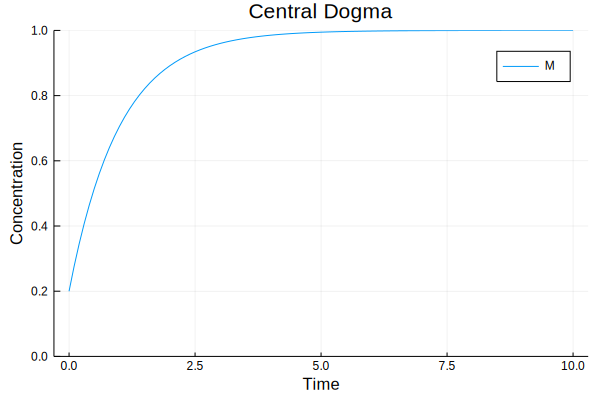

In [3]:
plot(t,t-> M₀*exp(-γ_M*t)+k_M*D*T/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,1))
title!("Central Dogma")
xaxis!("Time")
yaxis!("Concentration")

## Promoter leakining

This simplified approximation does not take into acount that promoters are not perfect, and that there is often a basal production of mRNA that is not negligible. The next set of inetactions includes the basal production of `M` in abseence of transcription factor `T` with a rate $\alpha_0$:

$$
\begin{align}
T+D &\overset{k_M}{\longrightarrow} M + T + D  \tag{28}\\ 
M &\overset{\gamma_M}{\longrightarrow} \emptyset \tag{29}\\
\emptyset &\overset{\alpha_0}{\longrightarrow} M \tag{30} 
\end{align}
$$

Now, following the same notation the stoichiometric matrices are
$$
A=\begin{bmatrix}
  1   &  1    &  0   \\ 
   0  &  0    &  1 \\
   0  &  0    &  0 \end{bmatrix} ;
B=\begin{bmatrix}
  1   &  1  &  1  \\
   0   &  0  &  0 \\
   0   &  0  &  1\end{bmatrix}; \tag{31}
$$



In [12]:
A = [1 1 0; 0 0 1; 0 0 0 ]
B = [1 1 1;0 0 0; 0 0 1 ]
stoichiometric_matrix= (B-A)'
println("The stoichiometric matrix is $stoichiometric_matrix ")

The stoichiometric matrix is [0 0 0; 0 0 0; 1 -1 1] 


Now the diagonal matrix of rate constants is;
$$
K=\begin{pmatrix}
 k_M & 0 & 0 \\
 0 & \gamma_M & 0 \\
 0 & 0 & \alpha_0
\end{pmatrix} \tag{32}
$$

and 

$$X^A=\begin{pmatrix}
X_1^1 \cdot X_2^1 \cdot X_3^0\\
X_1^0 \cdot X_2^0 \cdot X_3^1 \\
X_1^0 \cdot X_2^0 \cdot X_3^0
\end{pmatrix}=\begin{pmatrix}
X_1\cdot X_2\\
X_3\\
1
\end{pmatrix} \tag{33}
$$


So, we put all ingredients together

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t}\\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \end{bmatrix}& 
=  \begin{bmatrix} 0  & 0 & 0 \\ 0  & 0  & 0\\ 1 & -1 & 1 \end{bmatrix}
\begin{pmatrix}
 k_M & 0 & 0 \\
 0 & \gamma_M & 0 \\
 0 & 0 & \alpha_0
\end{pmatrix}
\begin{pmatrix}
X_1\cdot X_2\\
X_3\\
1
\end{pmatrix}  = \begin{bmatrix} 0  & 0 & 0 \\ 0  & 0  & 0\\ 1 & -1 & 1 \end{bmatrix}
\begin{pmatrix}
k_M \cdot X_1\cdot X_2\\
\gamma_M \cdot X_3\\
\alpha_0
\end{pmatrix} \tag{34}
\end{align}
$$




Now, the equation governing the dynamics of the mRNA concentration [M] is:

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}=  \alpha_0 + k_M [D]  [T]- \gamma_M [M] \tag{35}
$$
Following the same steps as the previous equation, we obatin the following solution:

 $$\begin{align*}
      [M]  &= \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} + C \cdot e^{-\gamma_M \cdot t}\tag{36}\\
 \end{align*}$$ 
 
  to evaluate the integration constant, we use the initial value of `M`:
 
  $$\begin{align*}
      [M(0)]  &= \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} + C \tag{37}\\
      C &= [M(0)] - \frac{\alpha_0 + k_M [D] [T]}{\gamma_M}  \tag{38}\\
 \end{align*}$$ 
 
 therefore the final equation is

  $$\begin{align*}
      [M(t)]  &= \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} + [M(0)] \cdot e^{-\gamma_M \cdot t} - \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} \cdot e^{-\gamma_M \cdot t}\tag{39}\\
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{40}\\
 \end{align*}$$ 
      
Therefore, with promoter leaking the dynamics of `mRNA` looks like this:

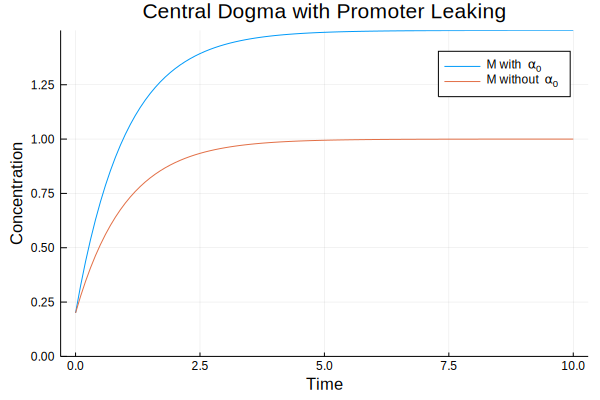

In [4]:
α_0=0.5
plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*T)/γ_M*(1-exp(-γ_M*t)),label="\\ M with \\alpha_0",seriestype=:line,ylims = (0,1.5))
plot!(t,t-> M₀*exp(-γ_M*t)+( k_M*D*T)/γ_M*(1-exp(-γ_M*t)),label="\\ M without \\alpha_0",seriestype=:line,ylims = (0,1.5))

title!("Central Dogma with Promoter Leaking")
xaxis!("Time")
yaxis!("Concentration")

## Hill Function and cooperativity

This first version of the model assumes that one molecule of transcription factor $T$ results in one molecule of `mRNA`. We known that this is not how transcription works. Normally, a molecule of transcription factor is able to recruit many molecules of RNA polymerase $pRNA$ and activate transcription of many molecules of $M$. Therefore, a more realistic way of working with differential equations to describe transcription is to substitute number of molecules of transciption factor [T] in the equation by a function where activation and deactivation of transcription of $M$ depends on the amount of [T]. For instance:
$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}=  \alpha_0 + k_M [D] \Phi ([T])- \gamma_M [M] \tag{41}
$$

$\Phi ([T])$ can be interpreted as the probability that a gene copy is transcribed at a given time, as a function of $[T]$. An additinal very importnat advantage of this approach is that it allows us to introduce the concept of a  transcription factor as activators (its presence results in activation of transcription) or as repressors (its presence results in repression of transcription). 
Depending on this, the regulatory function $\Phi([T])$ will increase or decrease with [T]. As a first approximation, $\Phi([T])$ is often assumed as a step function., i.e, the gene is transcribed (or repressed) when the transcription factor is bounded. 

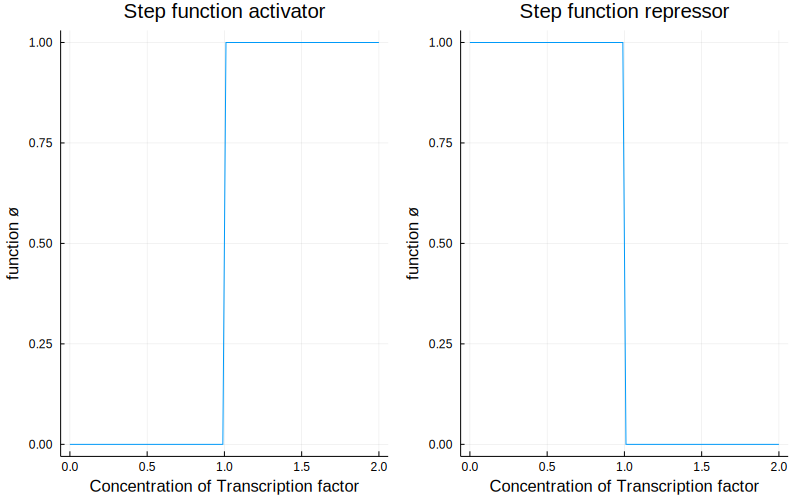

In [5]:
T_vector= LinRange(0,2,100)
n=1000
K=1
ϕ=D.*T_vector.^n./(K.^n.+T_vector.^n)
P1=plot(T_vector,ϕ,lab="")
title!("Step  function activator")
xlabel!("Concentration of Transcription factor")
ylabel!("function ø")

ϕ=D.*K.^n./(K.^n.+T_vector.^n)
P2=plot(T_vector,ϕ,lab="")
title!("Step function repressor")
xlabel!("Concentration of Transcription factor")
ylabel!("function ø")


plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

 The analytical soultion will look quite similar to the previous equation, just replacing [$T$] by [$\Phi ([T])$]

$$\begin{align*}
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + k_M [D] \Phi ([T])}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{42}\\
 \end{align*}$$ 
 
 and the solution will depend on whether there is a value of `T` higher or lower than 1:

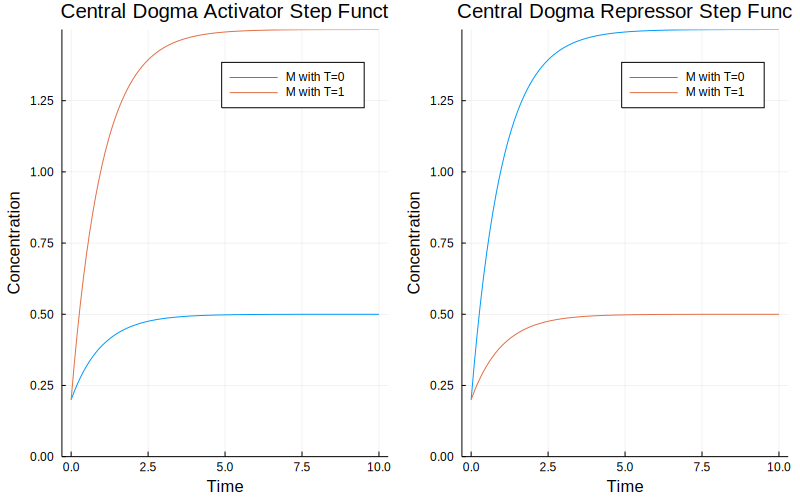

In [6]:
P1=plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*0.)/γ_M*(1-exp(-γ_M*t)),label="\\ M with T=0",seriestype=:line,ylims = (0,1.5))
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*1.)/γ_M*(1-exp(-γ_M*t)),label="\\ M with T=1",seriestype=:line,ylims = (0,1.5))

title!("Central Dogma Activator Step Funct")
xaxis!("Time")
yaxis!("Concentration")

P2=plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*1.)/γ_M*(1-exp(-γ_M*t)),label="\\ M with T=0",seriestype=:line,ylims = (0,1.5))
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*0.)/γ_M*(1-exp(-γ_M*t)),label="\\ M with T=1",seriestype=:line,ylims = (0,1.5))

title!("Central Dogma Repressor Step Func")
xaxis!("Time")
yaxis!("Concentration")

plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

We can see now that, when concentration of [T] is above a certain value, transcription is activated (for [T] as activator) or repressed (for [T] as repressors).  Binding and unbinding of [T] to the promoter is a highly dynamic procces, and more realistic scenario is that the probability of transcription of a gene $\Phi ([T],[D])$ depends on the time the trascription factor [T] is bound to the DNA [D]. This bindng and unbinding can be written as a chemical interaction as

$$ [D_{inactive}] + [T] \overset{k_1}{\underset{k_2}{\longleftrightarrow}}  [D_{active}] \tag{43}$$

To obtain a more general approximation,  we will introduce the possibility that several molecuels of the transcription factor are required to activate transcription. This is known as `cooperativity` and is represented in the following scheme of interaction. 

$$ [D_{inactive}] + n[T] \overset{k_1}{\underset{k_2}{\longleftrightarrow}}  [D_{Active}] \tag{44}$$

The dynamics of binding and unbinding of transcription factor to the DNA is much faster that the dynamics of transcription. Therefore, using separation of scales, we can consider that equilibrium is reached verty fast. Based on this assumption and on Mass Action Law, the concetrations at equilibrium satisfy the following relation: 
 
$$[D_{inactive}] \cdot [T]^n= \frac{k_2}{k_1}  [D_{Active}]= K_D \cdot [D_{Active}] \tag{45}$$

where $K_D$ is the chemical equilibrium constant. We have also an extra constraint given by the fact that the total number of DNA copies `[D]` is fixed, therefore:

$$[D_{Active}] + [D_{Inactive}] = [D] \tag{46}$$

Combining the equations 27 and 28, we can write the ratio of active copies of the transcriotion factor as:

$$
\begin{align}
\frac{[D_{Active}]}{[D]}&=\frac{[T]^n [D_{Inactive}]}{K_D}\cdot \frac{1}{[D_{Active}]+[D_{Inactive}]} \tag{47}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{[T]^n }{K_D \frac{[D_{Inactive}]+[D_{Active}]}{[D_{Inactive}]}} \tag{48}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{[T]^n }{ K_D(\frac{[D_{Active}]}{[D_{Inactive}]}+1)} \tag{49}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{[T]^n}{\frac{K_D \cdot [D_{Active}]}{[D_{Inactive}]}+K_D} \tag{50}\\
\end{align}$$


and using again the relation in Eq. 27, we obtain

$$\frac{[D_{Active}]}{[D]}=\frac{[T]^n}{K_D+[T]^n}  \tag{51}$$

if we rewrite the equilibrium constant $K_D$ as a new constant to the power of `n`, we obatin:

$$h^{(1)}=\frac{[D_{Active}]}{[D]}=\frac{[T]^n}{K^n+[T]^n}  \tag{52}$$

This equation $h^{(1)}$ is the well known `Hill function`. It satisfies the following properties:

1. $h^{(1)}(0)=0 \tag{53}$

2. $h^{(1)}(T=K)=\frac{1}{2} \tag{54}$

3.  $\lim_{T\to \infty} h^{(1)}(T) = 1 \tag{55}$

4. The maximum slope  controlled by the parameter `n`, with is calles sigmoidicity. To study the value of the slope and its correlation with the value of `n`, we divide numerator and denominator by $K^n$ and define the variable x as $x= T/K$. This way the normalized version of the Hill function is: 

$$
h^{(1)}=\frac{x^n}{1+x^n}\tag{56}
$$

we then calculate the slope by caluclating the value of the derivative of $h^{(1)}$ at the point $x=1$: 

$$\begin{align}
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}&=\frac{n x^{n-1} (1+x^n)-x^n \cdot n x^{-1}}{(1+x^n)^2} \tag{57}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}&=\frac{n x^{n-1} +x^n \cdot n x^{n-1}-x^n \cdot n x^{-1}}{(1+x^n)^2} \tag{58}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}&=\frac{n x^{n-1}  +x^n \cdot n x^{n-1}-x^n \cdot n x^{-1}}{(1+x^n)^2} \tag{59}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}&=\frac{n x^{n-1} }{(1+x^n)^2} \tag{60}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}\big|_{x=1}&=\frac{n 1^{n-1} }{(1+1^n)^2} \tag{61}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}\big|_{x=1}&=\frac{n}{4} \tag{62}
\end{align}$$



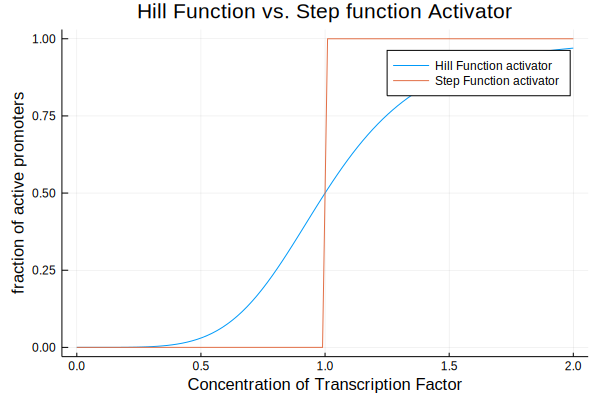

In [7]:
n=5
ϕ=T_vector.^n./(K.^n.+T_vector.^n)
P1=plot(T_vector,ϕ,lab="Hill Function activator")

n=1000
ϕ=T_vector.^n./(K.^n.+T_vector.^n)
P1=plot!(T_vector,ϕ,lab="Step Function activator")

title!("Hill Function vs. Step function Activator")
xlabel!("Concentration of Transcription Factor")
ylabel!("fraction of active promoters")

For repressors, 

$$ [D_{Active}] + n[T] \overset{k_1}{\underset{k_2}{\longleftrightarrow}}  [D_{Inactive}] \tag{63}$$

the equilibrium is now

$$[D_{Active}] \cdot [T]^n= \frac{k_2}{k_1}  [D_{Inactive}]= K_D \cdot [D_{Inactive}] \tag{64}$$
 and using the same conservation of of `D` we have
 
 $$
\begin{align}
\frac{[D_{Active}]}{[D]}&=\frac{K_D [D_{Inactive}]}{[T]^n}\cdot \frac{1}{[D_{Active}]+[D_{Inactive}]} \tag{65}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{K_D }{[T]^n \frac{[D_{Inactive}]+[D_{Active}]}{[D_{Inactive}]}} \tag{66}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{K_D }{[T]^n (\frac{[D_{Active}]}{[D_{Inactive}]}+1)} \tag{67}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{K_D }{\frac{[T]^n \cdot [D_{Active}]}{[D_{Inactive}]}+[T]^n} \tag{68}\\
\end{align}$$

and using again the relation in Eq 24, we obtain

$$\frac{[D_{Active}]}{[D]}=\frac{[K_D}{K_D+[T]^n}  \tag{69}$$

if we rewrite again the equilibrium constant $K_D$ as a new constant to the power of `n`, we obatin:

$$h^{(2)}=\frac{[D_{Active}]}{[D]}=\frac{K^n}{K^n+[T]^n} \tag{70}$$

This equation $h^{(1)}$ is now the `Hill function` for repressor molecules. It satisfies the following properties:

1. $h^{(2)}(0)=1 \tag{71}$

2. $h^{(2)}(K)=\frac{D}{2} \tag{72}$

3.  $\lim_{T\to \infty} h^{(2)}(T) = 0 \tag{73}$

4. The maximum slope  controlled by the parameter `n`, with is calles sigmoidicity. To study the value of the slope and its correlation with the value of `n`, we divide numerator and denominator by $K^n$ and define the variable x as $x= T/K$. This way the normalized version of the Hill function is: 

$$
h^{(2)}=\frac{1}{1+x^n}\tag{74}
$$

we then calculate the slope by caluclating the value of the derivative of $h^{(2)}$ at the point $x=1$: 


$$\begin{align}
\frac{\mathrm{d} h^{(2)}}{\mathrm{d} x}&=\frac{0 \cdot  (1+x^n) - 1 \cdot n x^{-1}}{(1+x^n)^2} \tag{75}\\
\frac{\mathrm{d} h^{(2)}}{\mathrm{d} x}&=- \frac{ n x^{-1}}{(1+x^n)^2} \tag{76}\\
\frac{\mathrm{d} h^{(2)}}{\mathrm{d} x}\big|_{x=1}&=- \frac{n 1^{n-1} }{(1+1^n)^2} \tag{77}\\
\frac{\mathrm{d} h^{(2)}}{\mathrm{d} x}\big|_{x=1}&=-\frac{n}{4} \tag{78}
\end{align}$$



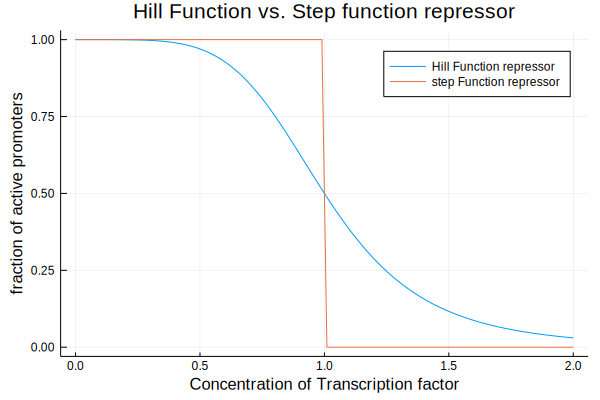

In [8]:
n=5
ϕ=K.^n./(K.^n.+T_vector.^n)
P2=plot(T_vector,ϕ,lab="Hill Function repressor")

n=1000
ϕ=K.^n./(K.^n.+T_vector.^n)
P2=plot!(T_vector,ϕ,lab="step Function repressor")
title!("Hill Function vs. Step function repressor")
xlabel!("Concentration of Transcription factor")
ylabel!("fraction of active promoters")

The Hill functions as activator or repressor are a more realistic approach to introduce the effect of a transcription factor into the Central Dogma Model. This way, the dynamics of production of [M] for activator is like this:  

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}= \alpha_0 + k_M \frac{[T^n][D]}{K^n+[T^n]}-\gamma_M[M]= \alpha_0 +\alpha_M \frac{[T^n]}{K^n+[T^n]}-\gamma_M[M] \tag{79}
$$
and for repression, we have

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}= \alpha_0 + k_M \frac{K^n[D]}{K^n+[T^n]}-\gamma_M[M]= \alpha_0 + \alpha_M \frac{K^n}{K^n+[T^n]}-\gamma_M[M] \tag{80}
$$

where we defined  $\alpha_M= k_M [D]$ as the maximum transcription rate of mRNA `M`. The set of interactions is then generalized as:

$$
\begin{align}
\emptyset &\overset{\alpha_0}{\longrightarrow} M \tag{81}\\ 
\Psi (T,K) &\overset{α_M}{\longrightarrow} M \tag{82}\\ 
M &\overset{\gamma_M}{\longrightarrow} \emptyset \tag{83}
\end{align}
$$

illustrating that the production of `M` is defined by a function of the amount of transcription factor `T` and the constant of the Hill funcion `K` that corresponds to the half maximal concetration of transcripton factor. This function $\Psi$ can refer to the Hill function for activator or for repressor. The analytical solution can be dertived similarly as before, and the resulting equation is:

$$\begin{align*}
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + \alpha_M \frac{[T^n]}{K^n+[T^n]}}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{84}\\
           [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{85}
 \end{align*}$$ 
 
 for activators and repressors respectively:

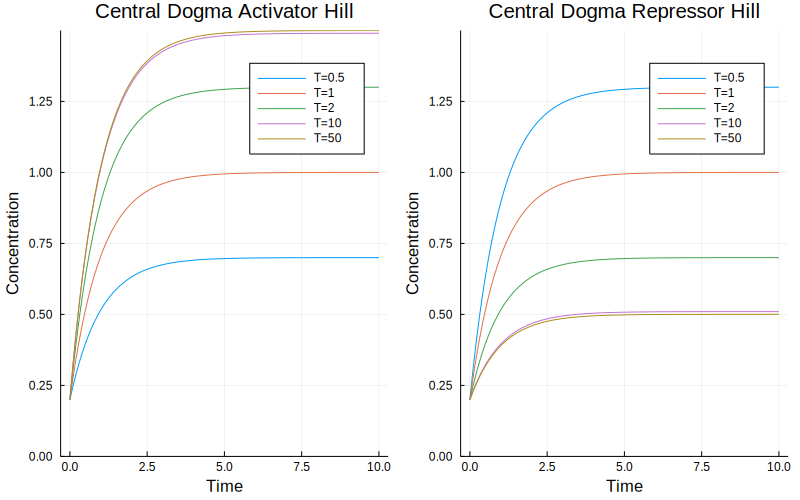

In [9]:
α_M=k_M*D
K=1.
n=2.
T=0.5
ϕ=T.^n./(K.^n.+T.^n)
P1=plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=0.5",seriestype=:line,ylims = (0,1.5))
T=1
ϕ=T.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=1",seriestype=:line,ylims = (0,1.5))
T=2
ϕ=T.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=2",seriestype=:line,ylims = (0,1.5))
T=10
ϕ=T.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=10",seriestype=:line,ylims = (0,1.5))
T=50
ϕ=T.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=50",seriestype=:line,ylims = (0,1.5))

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

T=0.5
ϕ=K.^n./(K.^n.+T.^n)
P2=plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=0.5",seriestype=:line,ylims = (0,1.5))
T=1
ϕ=K.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=1",seriestype=:line,ylims = (0,1.5))
T=2
ϕ=K.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=2",seriestype=:line,ylims = (0,1.5))
T=10
ϕ=K.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=10",seriestype=:line,ylims = (0,1.5))
T=50
ϕ=K.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=50",seriestype=:line,ylims = (0,1.5))
title!("Central Dogma Repressor Hill")
xaxis!("Time")
yaxis!("Concentration")


plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

The Hill function combines the fact that one mRNA can produce may proteins, but also the dependence on the amount of trancription factor `T`. It also adds a saturation term for high concentrations of trancription factor, compared to the value of the Hill constant `K`. 

## Protein dynamics

After analyzing the effect induced by the Hill function, the next step is to add the dynamics of the protein. The reactions that take place can be illustrated as:

$$
\begin{align}
\emptyset &\overset{\alpha_0}{\longrightarrow} M \tag{86}\\ 
\Psi (T,K) &\overset{α_M}{\longrightarrow} M \tag{87}\\ 
M &\overset{\gamma_M}{\longrightarrow} \emptyset \tag{88}\\
M &\overset{\alpha_P}{\longrightarrow} P \tag{89}\\
P &\overset{\gamma_P}{\longrightarrow} \emptyset \tag{90}
\end{align}
$$


where `P` is the concentration of protein, $\alpha_P$ and $\gamma_P$ correspond to syntehsis and degradation of `P`. Explicitely, for activators, the set of differential equations is:


$$\begin{align*}
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + \alpha_M \frac{[T^n]}{K^n+[T^n]}}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{91}\\
           \frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P] \tag{92}
 \end{align*}$$ 

and for repressors: 


$$\begin{align*}
           [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{93}\\
           \frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P] \tag{94}
 \end{align*}$$ 


To solve analytically, we will proceed with separation of variables:

$$\begin{align*}
           \frac{\mathrm{d} [P]}{\mathrm{d} t}  + \gamma_P[P]&=  \alpha_P [M] \tag{95}
 \end{align*}$$ 
 
 We need to calculate the integrating factor, $e^{ \int p(x)dx }$, which in this case is $e^{ \int k_2dt }=e^{\gamma_P \cdot t}$. We then multiply both terms in the previous equation by the integrating factor. In this case is simply 
 $$\begin{align*}
           \frac{\mathrm{d} [P]}{\mathrm{d} t} e^{\gamma_P \cdot t} + \gamma_P[P] e^{\gamma_P \cdot t}&=  \alpha_P [M] e^{\gamma_P \cdot t}\tag{96}
 \end{align*}$$ 
 
 the first term of the equation is simply

 $$\begin{align*}
           \frac{\mathrm{d} ([P]e^{\gamma_P \cdot t})}{\mathrm{d} t}  &=  \alpha_P [M] e^{\gamma_P \cdot t}\tag{97}
 \end{align*}$$
 
 now we substitute the solution for `M(t)` in Eq 66 and 67 into Eq 78:
 $$\begin{align*}
           \frac{\mathrm{d} ([P]e^{\gamma_P \cdot t})}{\mathrm{d} t}  &=  \alpha_P \big[ M(0) \cdot e^{-\gamma_M \cdot t} + \frac{W}{\gamma_M} (1  -  e^{-\gamma_M \cdot t}) e^{\gamma_P \cdot t}\big] \tag{98}
 \end{align*}$$
 
 where variable W is simply 
 $$W=\alpha_0 + \alpha_M \cdot \Psi(T,K) \tag{99}$$
 
 This function $\Psi(T,K)$ can refer to the Hill function for activator or for repressor. Now we solve the differential equation:
 
  $$\begin{align*}
           \int \mathrm{d} ([P]e^{\gamma_P \cdot t})  &=  \alpha_P \int  e^{\gamma_P \cdot t} \big[M(0) \cdot e^{-\gamma_M \cdot t} dt  + \int  \frac{W}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})  dt \big]\tag{100}
 \end{align*}$$
 
We reorganize the second term:
 
   $$\begin{align*}
           \int \mathrm{d} ([P]e^{\gamma_P \cdot t})  &=  \alpha_P  \big[\int e^{\gamma_P \cdot t} M(0) \cdot e^{-\gamma_M \cdot t} dt  + \int  \frac{W}{\gamma_M} e^{\gamma_P \cdot t} dt  -  \int e^{\gamma_P \cdot t} e^{-\gamma_M \cdot t}  dt \big]\tag{101}\\
            \int \mathrm{d} ([P]e^{\gamma_P \cdot t})  &=  \alpha_P   \big[M(0) \int e^{(\gamma_P-\gamma_M) t} dt  +  \frac{W}{\gamma_M} \int e^{\gamma_P \cdot t} dt  -  \frac{W}{\gamma_M} \int e^{(\gamma_P-\gamma_M) t}  dt \big]\tag{102}
 \end{align*}$$
 
 We solve the integral
 
  $$\begin{align*}
           P(t)e^{\gamma_P \cdot t}  &=  \alpha_P  \big[ \frac{e^{(\gamma_P-\gamma_M)\cdot t}M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{e^{\gamma_P \cdot t}}{\gamma_P}- \frac{e^{(\gamma_P-\gamma_M)\cdot t}}{\gamma_P-\gamma_M}) \big] +C \tag{103}\\
             P(t) &=  \alpha_P  \big[ \frac{e^{-\gamma_M\cdot t}M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{1}{\gamma_P}- \frac{e^{-\gamma_M\cdot t}}{\gamma_P-\gamma_M}) \big] +C \cdot e^{-\gamma_P \cdot t}  \tag{104}
 \end{align*}$$
 
 Now we calculate the integration constant using the initial condition for the protein $P(t=0)=P[0]$:
  $$\begin{align*}
             P(0) &=  \alpha_P  \big[ \frac{M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{1}{\gamma_P}- \frac{1}{\gamma_P-\gamma_M}) \big] +C  \tag{105}
 \end{align*}$$
 which rearranging terms becomes:
  $$\begin{align*}
             P(0) &=  \alpha_P  \big[ \frac{M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{\gamma_P-\gamma_M-\gamma_P}{\gamma_P(\gamma_P-\gamma_M)}) \big] +C  \tag{106}\\
              P(0) &=  \alpha_P  \big[ \frac{M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{-\gamma_M}{\gamma_P(\gamma_P-\gamma_M)}) \big] +C  \tag{107}\\ 
              P(0) &=  \alpha_P  \big[ \frac{M(0)}{\gamma_P-\gamma_M} - \frac{W}{\gamma_P(\gamma_P-\gamma_M)} \big] +C \tag{108}\\ 
 \end{align*}$$
 
 so
  $$\begin{align*}
               C &= P(0)-  \frac{ \alpha_P M(0)}{\gamma_P-\gamma_M} + \frac{\alpha_P W}{\gamma_P(\gamma_P-\gamma_M)}  \tag{109}\\
               C &= P(0)+  \frac{\alpha_P}{\gamma_P-\gamma_M}  \big[ \frac{W}{\gamma_P} -  M(0)\big] \tag{110}\\
 \end{align*}$$
 
Finally, the set of equations is:
 
  $$\begin{align*}
        [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{W}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{111}\\
                P(t) &=  \alpha_P  \big[ \frac{e^{-\gamma_M\cdot t}M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{1}{\gamma_P}- \frac{e^{-\gamma_M\cdot t}}{\gamma_P-\gamma_M}) \big] + \big[P(0)+  \frac{\alpha_P}{\gamma_P-\gamma_M}  \big[ \frac{W}{\gamma_P} -  M(0)\big] \big]\cdot e^{-\gamma_P \cdot t}  \tag{112}
 \end{align*}$$


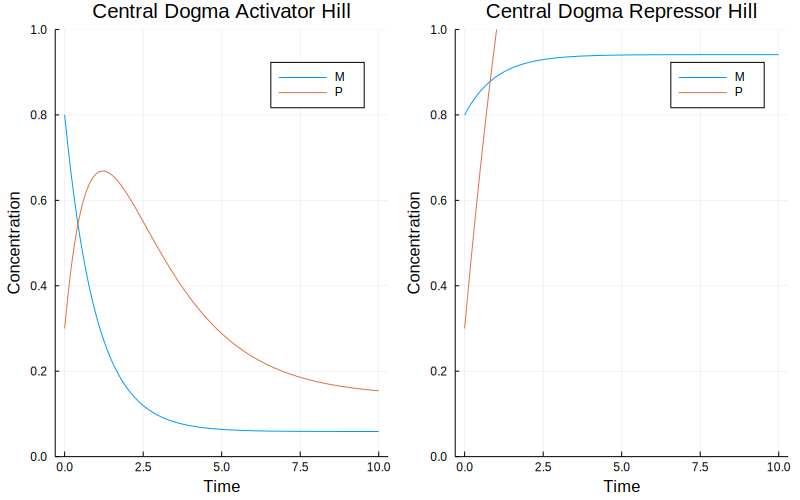

In [10]:
α_P=0.6*2
α_M=0.6
γ_M=1
γ_P=0.5
T=1.0*0.5
K=2
α_0=0.3*0
M₀=0.4*2
P₀=0.3
n=2
t=collect(0:0.1:10);
ϕ=T.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot(t,t-> M₀*exp(-γ_M*t)+W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,1))
plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ P",seriestype=:line)

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

ϕ=K.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot(t,t-> M₀*exp(-γ_M*t)+W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,1))
plot!(t,t->  α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ P",seriestype=:line)


title!("Central Dogma Repressor Hill")
xaxis!("Time")
yaxis!("Concentration")



plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))


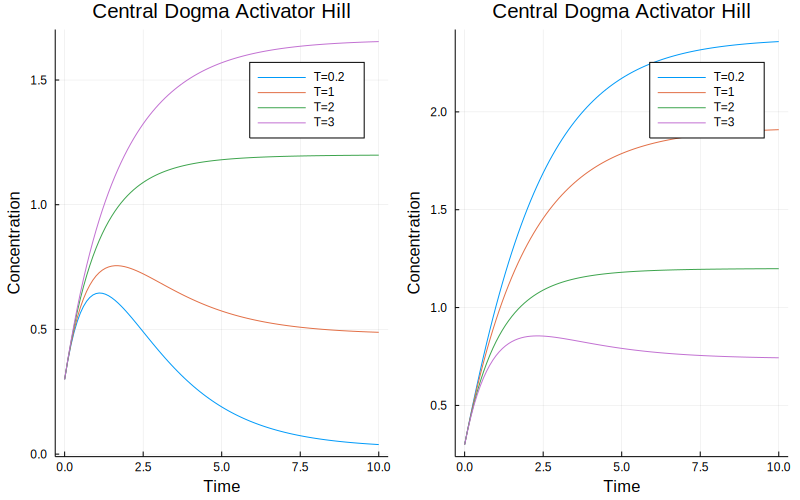

In [11]:
T=0.2
ϕ=T.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=0.2",seriestype=:line)
T=1
ϕ=T.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=1",seriestype=:line)
T=2
ϕ=T.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=2",seriestype=:line)
T=3
ϕ=T.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=3",seriestype=:line)

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

T=0.2
ϕ=K.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=0.2",seriestype=:line)
T=1
ϕ=K.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=1",seriestype=:line)
T=2
ϕ=K.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=2",seriestype=:line)
T=3
ϕ=K.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=3",seriestype=:line)

title!("Central Dogma Repressor Hill")
xaxis!("Time")
yaxis!("Concentration")

plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

 for the special case that no initial protein or mRNA:
 
  $$\begin{align*}
        [M(t)]  &=  \frac{W}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{113}\\
                P(t) &=  \alpha_P   \big[\frac{W}{\gamma_M} (\frac{\gamma_P-\gamma_M -\gamma_P e^{-\gamma_M\cdot t}}{\gamma_P(\gamma_P-\gamma_M)}) \big] +  \big[ \frac{\alpha_P W}{(\gamma_P-\gamma_M)\gamma_P} \big]\cdot e^{-\gamma_P \cdot t}  \tag{114}\\
                P(t) &=  \frac{\alpha_P W}{\gamma_P(\gamma_P-\gamma_M)}  \big[\frac{ \gamma_P-\gamma_M -\gamma_P e^{-\gamma_M\cdot t}}{\gamma_M}  +    e^{-\gamma_P \cdot t}\big]\cdot  \tag{115}\\
                 P(t) &=  \frac{\alpha_P W}{\gamma_P(\gamma_P-\gamma_M)}  \big[\frac{ \gamma_P(1- e^{-\gamma_M\cdot t})-\gamma_M}{\gamma_M}  +    e^{-\gamma_P \cdot t}\big]  \tag{116}\\
                  P(t) &=  \frac{\alpha_P W}{\gamma_P-\gamma_M}  \big[\frac{ 1- e^{-\gamma_M\cdot t}}{\gamma_M}   +    \frac{e^{-\gamma_P \cdot t} -1}{\gamma_P}\big] \tag{117}\\
                   P(t) &=  \frac{\alpha_P W}{\gamma_P-\gamma_M}  \big[\frac{ 1- e^{-\gamma_M\cdot t}}{\gamma_M}   -    \frac{1- e^{-\gamma_P \cdot t}}{\gamma_P}\big] \tag{118}
 \end{align*}$$
 

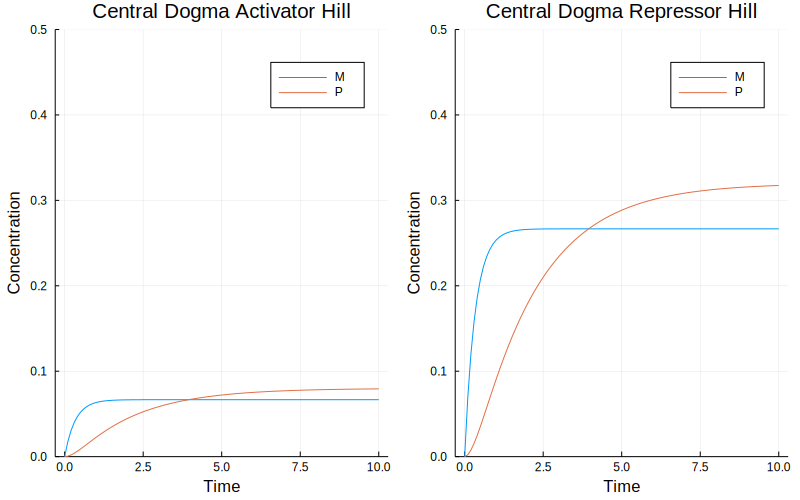

In [12]:
α_P=0.6
α_M=0.6
γ_M=3
γ_P=0.5
T=1.
K=2
α_0=0.
M₀=0.0
P₀=0.
n=2
t=collect(0:0.1:10);
ϕ=T.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot(t,t-> W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,0.5))
plot!(t,t-> α_P * W/(γ_P-γ_M)*(((1-exp(-γ_M*t))/γ_M)-((1-exp(-γ_P*t))/γ_P)),label="\\ P",seriestype=:line)

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

ϕ=K.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot(t,t-> W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,0.5))
plot!(t,t-> α_P * W/(γ_P-γ_M)*(((1-exp(-γ_M*t))/γ_M)-((1-exp(-γ_P*t))/γ_P)),label="\\ P",seriestype=:line)

title!("Central Dogma Repressor Hill")
xaxis!("Time")
yaxis!("Concentration")

plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

Having these two analytical solutions, one can ask many different questions, such as: 
 - How the amount protein changes with the cooperativity ? 
 - How the amount of protein changes with the Hill constant?

since $γ_M >> γ_P$, quite often, people tend to simplify the term that accounts for mRNA degradation 

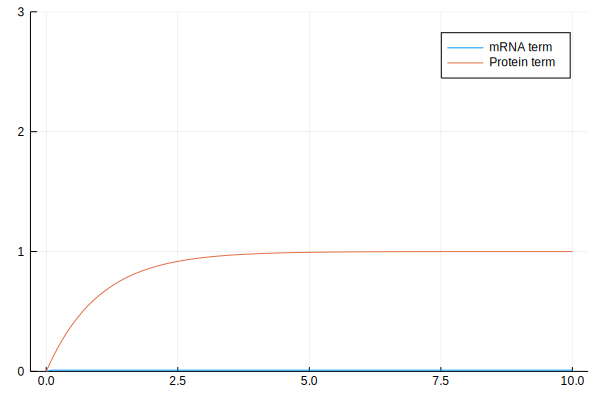

In [13]:
γ_M=100
γ_P=1
plot(t,t-> (1-exp(-γ_M*t))/γ_M,label="\\ mRNA term",seriestype=:line,ylims = (0,3))
plot!(t,t-> (1-exp(-γ_P*t))/γ_P,label="\\ Protein term",seriestype=:line,ylims = (0,3))

Therefore, we can simplify the Eq 93 as:

 $$\begin{align*}
                   P(t) &=  \frac{\alpha_P W}{-\gamma_M}  \big[ -    \frac{1- e^{-\gamma_P \cdot t}}{\gamma_P}\big] \tag{119}\\
                   P(t) &=  \frac{\alpha_P W}{\gamma_M \gamma_P}  \big[1- e^{-\gamma_P \cdot t}\big] \tag{120}
 \end{align*}$$
 
Therefore, the Central Dogma of Molecular Biology can be written in terms of two simple equations: 

$$\begin{align*}
           M(t)  &=  \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M} \big[1  -  e^{-\gamma_M \cdot t}\big]\tag{121}\\
           P(t) &=  \alpha_P \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M \gamma_P}  \big[1- e^{-\gamma_P \cdot t}\big] \tag{122}
 \end{align*}$$


To finalize, the fact that the cell is growing while mRNA and Protein are being produced introduces an extra  dilution factor $\mu$ that reduces the concetration of `M`and `P`. If the volume is assumed to grow linearly,we can simply write this dilution factor as: 

$$\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  k_M [D]  [T]- \gamma_M [M] - \mu [M] = k_M [D]  [T]- (\gamma_M+\mu) [M]  \tag{123}\\
 \frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P] - \mu [P] =  \alpha_P [M]-(\gamma_P +\mu )[P] \tag{124}
 \end{align*}$$
 
 The final analyitical solutions can be obtained following the same strategy:

$$\begin{align*}
           M(t)  &=  \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M+\mu} \big[1  -  e^{-(\gamma_M+\mu) \cdot t}\big]\tag{125}\\
           P(t) &=  \alpha_P \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{(\gamma_M+\mu) (\gamma_P+\mu)}  \big[1- e^{-(\gamma_P+\mu) \cdot t}\big] \tag{126}
 \end{align*}$$
 
 In real systems `mRNA` natural degradation is orders of magnitude larger that the effect of dilution. Therefore $\gamma_M+\mu \approx \gamma_M$, and the final equations are: 
 
 $$\begin{align*}
           M(t)  &=  \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M} \big[1  -  e^{-\gamma_M \cdot t}\big]\tag{127}\\
           P(t) &=  \alpha_P \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M (\gamma_P+\mu)}  \big[1- e^{-(\gamma_P+\mu) \cdot t}\big] \tag{128}
 \end{align*}$$


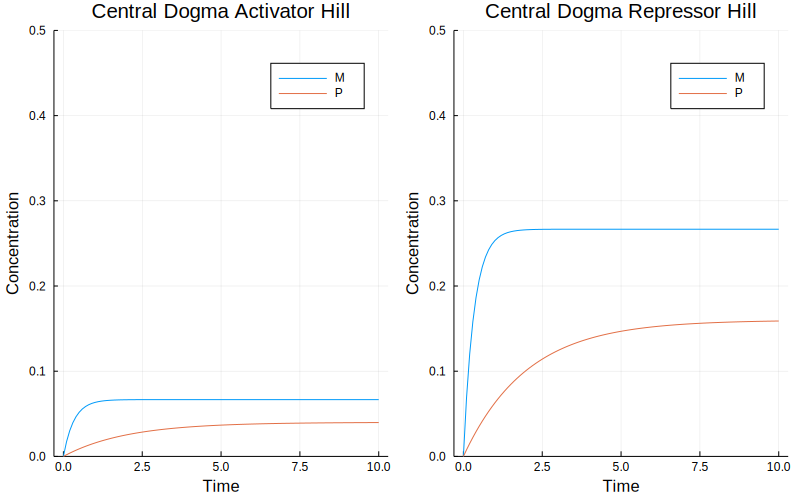

In [14]:
α_P=0.6
α_M=0.6
γ_M=3
γ_P=0.5
μ=0.5
T=1.
K=2
α_0=0.
M₀=0.0
P₀=0.
n=2
t=collect(0:0.1:10);
ϕ=T.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot(t,t-> W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,0.5))
plot!(t,t-> α_P * W/(γ_M*(γ_P+μ))*(1-exp(-γ_P*t)),label="\\ P",seriestype=:line)

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

ϕ=K.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot(t,t-> W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,0.5))
plot!(t,t-> α_P * W/(γ_M*(γ_P+μ))*(1-exp(-γ_P*t)),label="\\ P",seriestype=:line)

title!("Central Dogma Repressor Hill")
xaxis!("Time")
yaxis!("Concentration")

plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

## Conclusions

The __Central Dogma__ is one of the most important concepts of Modern Molecular Biology. The applications of this tool is broad and it is part of many papers in Mathematical Biology. The __Hill Function__ is also a widely used concept in Biochemistry, Physiology, Pharmacology and Genetics. In the context of the Central Dogma, both activator and repressor forms are commonly used to model numerically the transctiption and translation of mRNA into protein regulated by transcriptional activators and represors, respectively.  

Althouth the use of the Hill function has to be carefully discussed, since it is physically unrealistic: 
- It assumes that all ligands have to bind simultaneously during cooperativity 
- It is only exact in conditions of extremely high cooperativity  
- It is based on equilibrium considerations (as we discussed, Biological systems are often operating far from equilibrium)

A more realistic approach will be to include sequential or independent binding of the transcription factors to the promoter DNA, but this approach really complicates the analysis and it often represents a small correction versus the very simple Hill equation. Therefore, the simplicity wins and teh Hill approach it is widely used in many biological contexts (as we will see…).

### <font color=red>Computer Task:</font> 

Solve numerically the Equations of the Central Dogma for activator and repressor and compare the solutions obained with the analitical solutions derived in this notebook. 

Compare the effect of changing the concentration of the transcription factor between activator and inhibitors. Commment what is the main difference between both cases. Use the following parameters:

In [6]:
tspan = (0.0,10)
α_P=0.6
α_M=0.6
γ_M=3
γ_P=0.5
μ=0.5
T=1.
K=2
α_0=0.
M₀=0.05
P₀=0.05
n=2;

## Numerical solution of the Central Dogma

Another way to solve this type of models when they become too complex is using nuymerical simulations. We will present two examples, trasncription factor as activator and as repressor. 

In [15]:
using DifferentialEquations
using ParameterizedFunctions
tspan = (0.0,10)

(0.0, 10)

In [16]:
CentralDogma4_DSL! = @ode_def ab begin
   dM = α_0-γ_M*M+α_M*T^n/(K^n +T^n)
   dP =   α_P * M - γ_P * P
    end α_0 α_M α_P γ_M γ_P T K n

CentralDogma5_DSL! = @ode_def ab begin
   dM = α_0-γ_M*M+α_M*K^n/(K^n +T^n)
   dP =   α_P * M - γ_P * P
    end α_0 α_M α_P γ_M γ_P T K n

(::ab{var"#89#93",var"#90#94",var"#91#95",Nothing,Nothing,var"#92#96",Expr,Expr}) (generic function with 2 methods)

In [17]:
p=[α_0,α_M,α_P,γ_M,γ_P,T,K,n];
u₀ = [M₀,P₀]
prob3 = ODEProblem(CentralDogma4_DSL!,u₀,tspan,p)
prob4 = ODEProblem(CentralDogma5_DSL!,u₀,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.0, 0.0]

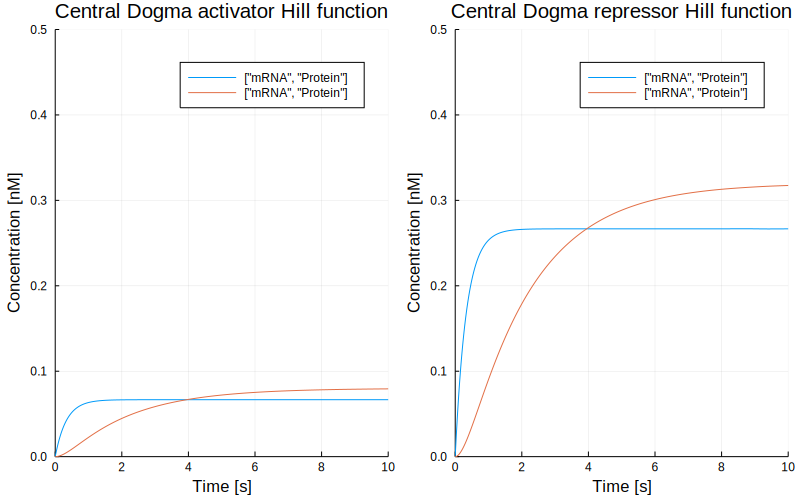

In [18]:
sol3 = solve(prob3)
sol4 = solve(prob4)
P3=plot(sol3,label=["mRNA","Protein"],ylims = (0,0.5))
title!("Central Dogma activator Hill function")
xlabel!("Time [s]")
ylabel!("Concentration [nM]")
P4=plot(sol4,label=["mRNA","Protein"],ylims = (0,0.5))
title!("Central Dogma repressor Hill function")
xlabel!("Time [s]")
ylabel!("Concentration [nM]")
plot(P3,P4,layout=(1,2),legend=true,size = (800, 500))

which are equivalent to the dynamcis predicted in the analytical solution. To study the differences in the dependence of the concentration betwen activatior and repressor, we will plot the same solution for different concetrations of the transcription factor. 

In [19]:
function CentralDogma_activator_parameters(α_0,α_M,α_P,γ_M,γ_P,T,K,n)
     p=[α_0,α_M,α_P,γ_M,γ_P,T,K,n];
     prob3 = ODEProblem(CentralDogma4_DSL!,u₀,tspan,p)
     sol3 = solve(prob3)
     x=("T = $(T)")
     plot!(sol3,vars=(2),label=x)
end

function CentralDogma_repressor_parameters(α_0,α_M,α_P,γ_M,γ_P,T,K,n)
     p=[α_0,α_M,α_P,γ_M,γ_P,T,K,n];
     prob4 = ODEProblem(CentralDogma5_DSL!,u₀,tspan,p)
     sol4 = solve(prob4)
     x=("T = $(T)")
     plot!(sol4,vars=(2),label=x)
end

CentralDogma_repressor_parameters (generic function with 1 method)

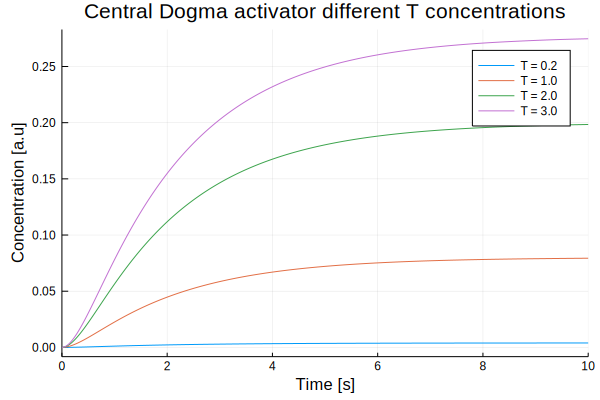

In [20]:
plot()
for T in [0.2,1,2,3]
   CentralDogma_activator_parameters(α_0,α_M,α_P,γ_M,γ_P,T,K,n)
end
title!("Central Dogma activator different T concentrations")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

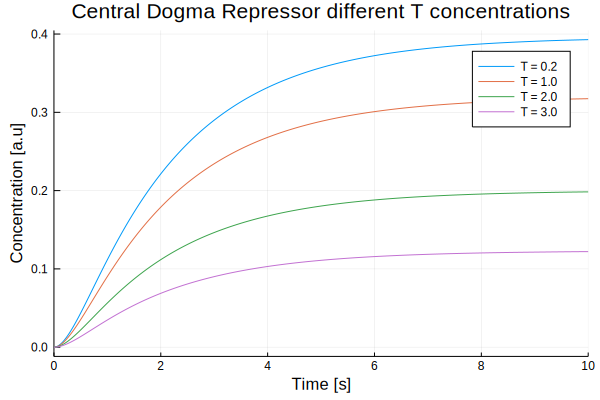

In [21]:
plot()
for T in [0.2,1,2,3]
   CentralDogma_repressor_parameters(α_0,α_M,α_P,γ_M,γ_P,T,K,n)
end
title!("Central Dogma Repressor different T concentrations")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")